In [1]:
%matplotlib inline
import torch
import torchvision
from torchvision import transforms
from torch.utils import data
from d2l import torch as d2l

d2l.use_svg_display()


In [32]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=trans)
mnist_test = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=trans)
len(mnist_train), len(mnist_test)

(60000, 10000)

In [33]:
mnist_train[0][0].shape # 第一个0代表样本索引（一个样本中包含了图片和标签）

torch.Size([1, 28, 28])

In [46]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

array([<AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'t-shirt'}>], dtype=object)

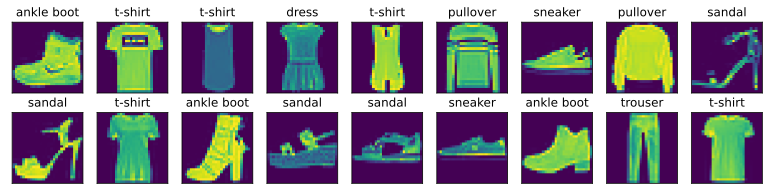

In [47]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y))

In [51]:
batch_size = 256
def get_dataloader_workers():
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()) # num_workers 设置进程数
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'3.80 sec'

In [52]:
def load_data_fashion_mnist(batch_size, resize=None):  #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="./data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="./data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

In [54]:
import torch
from IPython import display
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [89]:
num_input = 784
num_output = 10
W = torch.normal(0, 0.01, size=(num_input, num_output), requires_grad=True)
b = torch.zeros(num_output, requires_grad=True)
W

tensor([[-0.0086,  0.0029,  0.0103,  ..., -0.0139, -0.0006,  0.0149],
        [-0.0149,  0.0058, -0.0162,  ..., -0.0127,  0.0020, -0.0145],
        [ 0.0027,  0.0024, -0.0052,  ..., -0.0034, -0.0044, -0.0081],
        ...,
        [ 0.0058,  0.0025, -0.0110,  ..., -0.0050, -0.0133,  0.0137],
        [ 0.0152,  0.0075,  0.0027,  ..., -0.0009,  0.0055, -0.0027],
        [ 0.0036, -0.0013,  0.0045,  ..., -0.0065, -0.0038,  0.0030]],
       requires_grad=True)

In [91]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True) # 求和是按照.shape 的索引来计算的

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [94]:
def softmax(X):
    X_exp = torch.exp(X)
    print(X_exp)
    partition = X_exp.sum(dim=1, keepdim=True)
    print(partition)
    return X_exp / partition
softmax(X)

tensor([[  2.7183,   7.3891,  20.0855],
        [ 54.5981, 148.4132, 403.4288]])
tensor([[ 30.1929],
        [606.4401]])


tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [95]:
X.shape

torch.Size([2, 3])

In [96]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

In [97]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [132]:
# LOSS
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)), y]) #y_hat[range(len(y_hat)), y] 选择了每个样本中预测的对应真实类别的概率值。
cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [113]:
def accuracy(y_hat, y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    print(y_hat.type(y.dtype))
    cmp = y_hat.type(y.dtype) == y
    print(cmp.type(y.dtype))
    return float(cmp.type(y.dtype).sum())
accuracy(y_hat, y) / len(y)

tensor([2, 2])
tensor([0, 1])


0.5

In [114]:
def evaluate_accuracy(net, data_iter):
    if isinstance(net, torch.nn.Module):
        net.eval()
    metric = d2l.Accumulator(2)
    for X, y in data_iter:
        metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [115]:
evaluate_accuracy(net, test_iter)

tensor([[1.0465, 1.0949, 1.0777,  ..., 0.9445, 0.9787, 0.9197],
        [1.0924, 1.3313, 1.0664,  ..., 1.0536, 1.1965, 0.8734],
        [1.0987, 1.1205, 0.9283,  ..., 1.3694, 0.9920, 1.0196],
        ...,
        [0.9622, 1.0432, 1.0353,  ..., 1.0813, 1.0343, 1.0230],
        [1.0063, 1.0494, 1.0024,  ..., 0.8966, 0.9664, 1.0546],
        [1.1957, 1.3252, 0.9478,  ..., 1.1572, 1.3318, 0.9135]],
       grad_fn=<ExpBackward0>)
tensor([[ 9.8128],
        [10.6120],
        [10.8883],
        [10.2718],
        [10.4351],
        [11.0643],
        [10.2821],
        [10.3151],
        [10.1309],
        [ 9.9071],
        [10.5901],
        [ 9.5523],
        [ 9.7859],
        [10.6425],
        [10.7637],
        [10.5095],
        [10.2742],
        [10.7096],
        [10.0382],
        [10.7073],
        [10.6924],
        [ 9.7672],
        [ 9.5746],
        [ 9.6940],
        [10.4680],
        [10.0440],
        [10.8171],
        [11.1174],
        [ 9.8597],
        [10.8514],
 

0.0601

In [133]:
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """训练模型一个迭代周期（定义见第3章）"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = d2l.Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            print("使用自定义的优化器")
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

In [134]:
class Animator:  #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [135]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """训练模型（定义见第3章）"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [136]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

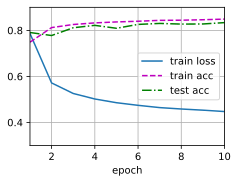

In [137]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

tensor([[1.2384e-02, 9.8059e-03, 9.7480e-02,  ..., 2.3037e+02, 1.1380e+01,
         5.9551e+02],
        [7.0725e+00, 1.0473e-01, 2.9009e+04,  ..., 5.5378e-05, 2.2101e+00,
         2.0213e-03],
        [2.2356e+01, 2.7506e+05, 6.4375e+00,  ..., 1.1761e-01, 2.9858e-01,
         3.7699e-03],
        ...,
        [6.6006e-02, 1.7580e-01, 3.4572e-01,  ..., 1.0924e+01, 6.0179e-01,
         3.4468e+00],
        [2.1087e-01, 2.1332e-02, 2.5914e-01,  ..., 5.0236e+00, 3.5252e+01,
         9.4570e+00],
        [1.5357e+00, 1.3701e+00, 4.2664e+03,  ..., 1.1604e-04, 4.6438e+00,
         2.5664e-04]], grad_fn=<ExpBackward0>)
tensor([[9.4419e+02],
        [3.0098e+04],
        [2.7514e+05],
        [9.6463e+04],
        [1.2682e+02],
        [7.9937e+03],
        [5.4762e+02],
        [2.4120e+02],
        [2.3883e+01],
        [1.0898e+03],
        [6.5156e+02],
        [1.3815e+02],
        [1.8785e+02],
        [2.2762e+03],
        [5.2940e+03],
        [4.1196e+03],
        [2.5069e+02],
      

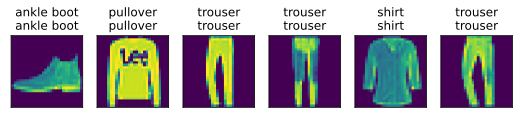

In [138]:
def predict_ch3(net, test_iter, n=6):  #@save
    """预测标签（定义见第3章）"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

In [150]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [151]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
def init_weights(m):
    if type(m) == nn.Linear: 
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [152]:
loss = nn.CrossEntropyLoss()

In [153]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

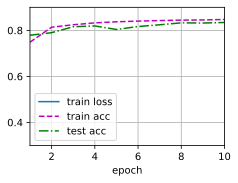

In [154]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [2]:
import torch
torch.cuda.is_available()

True